### **Analyze past stock data to estimate win rates of straddle / strange** 
*Author: Lim Chin En*

*Updated Date: 04/03/2022*

Options are financial derivatives that give buyers the right, but not the obligation, to buy or sell an underlying asset at an agreed-upon price and date. These contracts involve a buyer and seller, where the buyer pays a premium for the rights granted by the contract. 

<br>

Options are versatile financial products. Multiple options can be combined to form different option strategy that allow the trader to profit in different type of situation. Two of the option strategy that usually implemented is the Strangle and Straddle strategy. It is establihsed by buying one call option and one put option. The curve in black color is the net effect of the options.

<br>

#### **Strangle Strategy:**
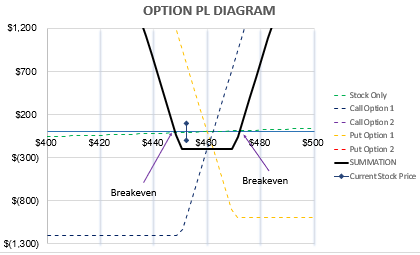

#### **Straddle Strategy:**
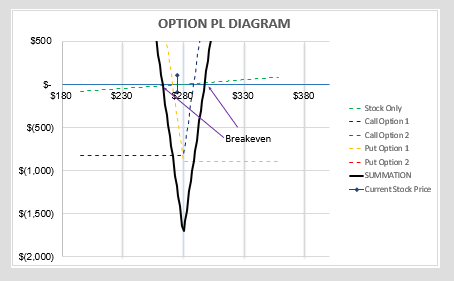

<br>

As shown as the profit-loss diagram above, the trader can make a profit from either direction (either the stock price drop or raise). The trader is not required to anticipate the direction of the stock. However, in order to profit, the change of the stock price must be large enough to cross-over the breakeven price before the expirary date of the option. Otherwise the option premium will be lost.

<br>

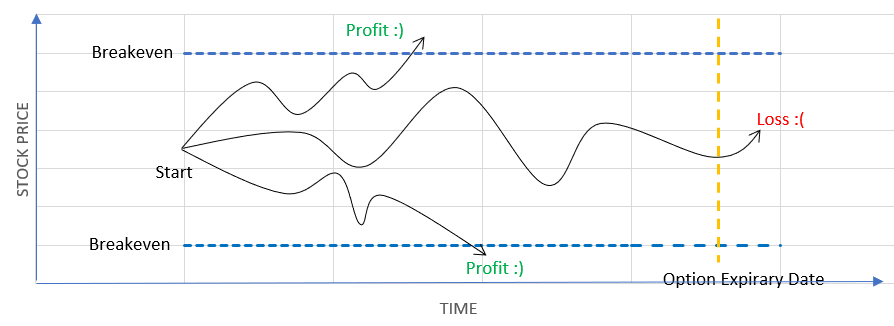

<br>

In order to evaluate the risk of the option strategy, it is good to understand how likely the stock price are going to change and the magnitude of the change in the future. The following python codes return the change of stock price within a specified option duration based on the historical stock price. 

<br>

#### Assumptions:
In this analysis, we are only look into the overall change of the stock price from the option start date to the expirary rate. Any price fluctuation in between the option start date and expirary date is not considered. 

<br>

*Disclaimer: All investment strategies and investments involve risk of loss. Nothing in this project and article constitutes professional and/or financial advice. Past performance are not guarantee of the future results.*

#### Import nessasary libraries and stock price historical data
- We will use Microsoft's stock (MSFT) as an example
- We will investigate the data from year 2018 til date

In [1]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date

#Take Microsoft's stock as an example
tickerSymbol = 'MSFT'
tickerData = yf.Ticker(tickerSymbol)
stock_master = tickerData.history(period='1d' , start='2018-01-01', end=date.today())
#See Remarks
stock_master.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,81.700987,81.871731,81.103386,81.530243,22483800,0.0,0
2018-01-03,81.634580,82.061444,81.549211,81.909668,26061400,0.0,0
2018-01-04,82.137328,83.152313,82.118360,82.630592,21912000,0.0,0
2018-01-05,83.152300,83.863733,82.934124,83.655045,23407100,0.0,0
2018-01-08,83.664530,84.024994,83.095385,83.740417,22113000,0.0,0


#### Some pre-processing of the stock's historical data

In [13]:
def index_convert_close(input_df):
    "The function below converts the date index to dataframe, and replace the index with 1,2,3..."
    didx = input_df.index
    date_df = didx.to_frame(index = False)
    
    #Open
    open_list = input_df['Open'].tolist()
    open_df = pd.DataFrame(open_list,columns=['Open'])   
    
    #High
    high_list = input_df['High'].tolist()
    high_df = pd.DataFrame(high_list,columns=['High'])       
    
    #Low
    low_list = input_df['Low'].tolist()
    low_df = pd.DataFrame(low_list,columns=['Low'])         
    
    #Close
    close_list = input_df['Close'].tolist()
    close_df = pd.DataFrame(close_list,columns=['Close'])
    
    #Volume
    volume_list = input_df['Volume'].tolist()
    volume_df = pd.DataFrame(volume_list,columns=['Volume'])    
    
    stock_close = pd.concat([date_df, open_df, high_df, low_df, close_df, volume_df], axis=1, ignore_index=False)
    return stock_close

stock = index_convert_close(stock_master)
stock.head(5)

,Date,Open,High,Low,Close,Volume
0,2018-01-02,81.869896,82.040994,81.271060,81.698799,22483800
1,2018-01-03,81.803383,82.231130,81.717838,82.079041,26061400
2,2018-01-04,82.307138,83.324221,82.288130,82.801422,21912000
3,2018-01-05,83.324241,84.037146,83.105614,83.828026,23407100
4,2018-01-08,83.837529,84.198739,83.267207,83.913574,22113000


#### The following code return the change of stock price within 10 days. 
- In this case we use 10 days as an example. You may change the duration according to your option's requirements.

In [14]:
no_of_rows = len(stock)

# In days
duration_of_option = 10

# Percentage change list
profit_loss_list = []

for row_index in range(0,no_of_rows):
    
    if 0 <= row_index <= duration_of_option:
        profit_loss = np.nan
        profit_loss_list.append(profit_loss)
    else:
        before_price = stock['Close'][row_index - duration_of_option]
        after_price = stock['Close'][row_index]
        profit_loss = (after_price - before_price) / before_price
        profit_loss_list.append(profit_loss)    

        
stock['P/L'] = profit_loss_list 

stock.head(15)

,Date,Open,High,Low,Close,Volume,P/L
0,2018-01-02,81.869896,82.040994,81.271060,81.698799,22483800,NaN
1,2018-01-03,81.803383,82.231130,81.717838,82.079041,26061400,NaN
2,2018-01-04,82.307138,83.324221,82.288130,82.801422,21912000,NaN
3,2018-01-05,83.324241,84.037146,83.105614,83.828026,23407100,NaN
4,2018-01-08,83.837529,84.198739,83.267207,83.913574,22113000,NaN
5,2018-01-09,84.265269,84.341314,83.514342,83.856537,19484300,NaN
6,2018-01-10,83.514356,83.828036,83.086616,83.476334,18652200,NaN
7,2018-01-11,83.770980,83.770980,82.925001,83.723457,17808900,NaN
8,2018-01-12,84.284280,85.339379,84.075160,85.168282,24271500,NaN
9,2018-01-16,85.643553,86.299427,83.656930,83.980110,36599700,NaN


In [15]:
# total number of 10 day option
total_number = len(stock) - duration_of_option
total_number

990

#### In the following code, we are going to count the frequency of stock change % acoss 10 days for either up or down direction.

In [16]:
percentage_filter_list = [0.005, 0.0075, 0.01, 0.015, 0.020, 0.030, 0.050, 0.080, 0.10, 0.20]
number_of_filtered_list = []
percentage_changed_list =[]
print("Total number of trade = ", total_number)

for change in percentage_filter_list:
    criter1 = (stock["P/L"] > change) | (stock["P/L"] < -change)              
    stock_1 = stock.iloc[criter1.values,:]
    number_of_filtered = len(stock_1)
    number_of_filtered_list.append(number_of_filtered)
    percentage_changed_list.append(number_of_filtered / total_number)

    df_winning_rate = pd.DataFrame(percentage_filter_list,columns=['Min Change from Stock Price'])

df_winning_rate['Number of winning trades'] = number_of_filtered_list
df_winning_rate['Percentage %'] = percentage_changed_list
df_winning_rate

Total number of trade =  990


,Min Change from Stock Price,Number of winning trades,Percentage %
0,0.0050,905,0.914141
1,0.0075,857,0.865657
2,0.0100,810,0.818182
3,0.0150,717,0.724242
4,0.0200,628,0.634343
5,0.0300,486,0.490909
6,0.0500,251,0.253535
7,0.0800,81,0.081818
8,0.1000,38,0.038384
9,0.2000,2,0.002020


The table shows the percentage of a particular magnitude of stock price move that has happened. For example, the row no. 4 shows that there will be 63.4% probability that the stock will move from its original price by +- 2%.

<br>

It means that if the breakeven of the straddle / strange strategy is 2% from the original stock price, there will be a probability of 63.4% where the stock price will move cross the breakeven and gives a profit. 

<br>

Of course, past performance are not guarantee of the future results. Relying on past probability doesn't means that the future stock market will behave the same. However it is still useful because at the very least it can help trader to get a feeling of the risk of the strange. Trader may use it together with other factors like macroeconimic factor and technical analysis to make good trading decisions.

The following code visualize the data by plotting them on a bar chart.

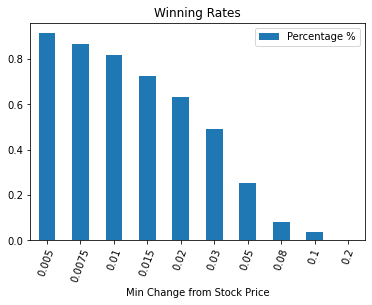

In [17]:
import matplotlib.pyplot as plt
df_winning_rate.plot.bar(x="Min Change from Stock Price", y="Percentage %", rot=70, title="Winning Rates");
plt.show(block=True);

#### Revision Notes:
- Rev.0 15/12/2021: First Version
- Rev.1 04/03/2022:
    - Include additional expaination.

<br>

#### Reference:
<br>
https://www.investopedia.com/terms/o/option.asp
<br>
https://www.investopedia.com/terms/s/straddle.asp
<br>
https://www.investopedia.com/terms/s/strangle.asp